In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv("Iris.csv")
data.drop(["Id"],axis=1,inplace = True)

In [27]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


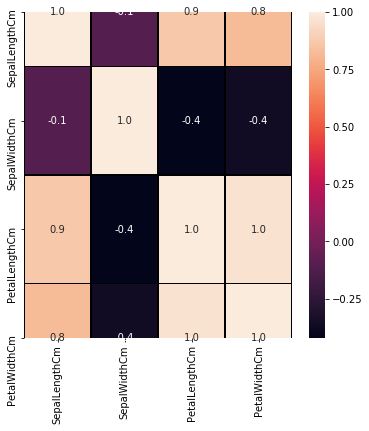

In [53]:
f, ax = plt.subplots(figsize=(6,6))
#plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot =True,  linewidth=0.5, linecolor = "black", fmt = ".1f",ax = ax)
plt.show()

In [54]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [210]:

#normalization
x,y = data.loc[:,data.columns != "Species"],data.loc[:,"Species"]
x = (x-np.min(x))/(np.max(x)-np.min(x))
# One hot encoder label..
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#y_ = [0 if i =="Iris-setosa" else i for i in y]
#y_ = [1 if i =="Iris-versicolor" else i for i in y_]
#y_ = [2 if i =="Iris-virginica" else i for i in y_]

#y = [0  if i =="Iris-setosa"  if i=="Iris-virginica" 1 else 2 for i in y]
#y_ = []
#val = 0


#for i in y:
#    if i=="Iris-setosa":
#        val = 0
#    if i =="Iris-virginica":
#        val = 1
#    else:
#        val = 2
#    y_.append(val)

In [184]:
from collections import Counter
Counter(y_)


Counter({0: 50, 1: 50, 2: 50})

Counter({0: 50, 1: 50, 2: 50})

In [213]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3,random_state= 42)

In [214]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42, max_iter=50)
lr.fit(x_train,y_train)
print("score:", lr.score(x_test,y_test))

score: 0.8444444444444444


C:\Users\Serhat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Serhat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [215]:
lr.predict(x_test)

array([1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       0])

In [204]:
a = x_test[0:1]


In [205]:
lr.predict(a)

array(['Iris-versicolor'], dtype=object)

In [206]:
y_test[0:1]

73    Iris-versicolor
Name: Species, dtype: object

In [223]:
from sklearn.metrics import confusion_matrix
predict =  lr.predict(x_test)
cm = confusion_matrix(y_test,predict)
print(cm)

[[19  0  0]
 [ 0  6  7]
 [ 0  0 13]]


In [218]:
Counter(y_test)


Counter({1: 13, 0: 19, 2: 13})

In [219]:
y_test.shape



(45,)

In [232]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print(linear_reg.score(x_test,y_test))
linear_reg.predict(a)


0.9440499084897118


array([1.24042717])

In [241]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
print("accuracy:",knn.score(x_test,y_test))
predict = knn.predict(x_test)
cm = confusion_matrix(y_test,predict)
print("c:",cm)





accuracy: 1.0
c: [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
